# Finance Data Project 

In [1]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import plotly
import cufflinks as cf
%matplotlib inline

cf.go_offline()
sns.set_style('whitegrid')

## Data

We will get stock information for the following banks:
*  Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo

In [2]:
bac = data.DataReader("BAC", 'yahoo', start=datetime(2006,1,1), end=datetime(2016,1,1))
bac.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2006-01-03,47.180000,46.150002,46.919998,47.080002,16296700.0,33.942665
2006-01-04,47.240002,46.450001,47.000000,46.580002,17757900.0,33.582191
2006-01-05,46.830002,46.320000,46.580002,46.639999,14970700.0,33.625435
2006-01-06,46.910000,46.349998,46.799999,46.570000,12599800.0,33.574955
2006-01-09,46.970001,46.360001,46.720001,46.599998,15619400.0,33.596592


In [3]:
c = data.DataReader("C", 'yahoo', start=datetime(2006,1,1), end=datetime(2016,1,1))
c.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2006-01-03,493.799988,481.100006,490.000000,492.899994,1537600.0,365.387665
2006-01-04,491.000000,483.500000,488.600006,483.799988,1870960.0,358.641724
2006-01-05,487.799988,484.000000,484.399994,486.200012,1143160.0,360.420929
2006-01-06,489.000000,482.000000,488.799988,486.200012,1370210.0,360.420929
2006-01-09,487.399994,483.000000,486.000000,483.899994,1680740.0,358.715851


In [4]:
gs = data.DataReader("GS", 'yahoo', start=datetime(2006,1,1), end=datetime(2016,1,1))
gs.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2006-01-03,129.440002,124.230003,126.699997,128.869995,6188700.0,103.863998
2006-01-04,128.910004,126.379997,127.349998,127.089996,4861600.0,102.429337
2006-01-05,127.320000,125.610001,126.000000,127.040001,3717400.0,102.389069
2006-01-06,129.250000,127.290001,127.290001,128.839996,4319600.0,103.839813
2006-01-09,130.619995,128.000000,128.500000,130.389999,4723500.0,105.089027


In [5]:
jpm = data.DataReader("JPM", 'yahoo', start=datetime(2006,1,1), end=datetime(2016,1,1))
jpm.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2006-01-03,40.360001,39.299999,39.830002,40.189999,12838600.0,26.345465
2006-01-04,40.139999,39.419998,39.779999,39.619999,13491500.0,26.193422
2006-01-05,39.810001,39.500000,39.610001,39.740002,8109400.0,26.272760
2006-01-06,40.240002,39.549999,39.919998,40.020000,7966900.0,26.457867
2006-01-09,40.720001,39.880001,39.880001,40.669998,16575200.0,26.887585


In [6]:
ms = data.DataReader("MS", 'yahoo', start=datetime(2006,1,1), end=datetime(2016,1,1))
ms.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2006-01-03,58.490002,56.740002,57.169998,58.310001,5377000.0,35.864342
2006-01-04,59.279999,58.349998,58.700001,58.349998,7977800.0,35.888939
2006-01-05,58.590000,58.020000,58.549999,58.509998,5778000.0,35.987354
2006-01-06,58.849998,58.049999,58.770000,58.570000,6889800.0,36.024246
2006-01-09,59.290001,58.619999,58.630001,59.189999,4144500.0,36.405598


In [7]:
wfc = data.DataReader("WFC", 'yahoo', start=datetime(2006,1,1), end=datetime(2016,1,1))
wfc.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2006-01-03,31.975000,31.195000,31.600000,31.900000,11016400.0,20.353491
2006-01-04,31.820000,31.365000,31.799999,31.530001,10870000.0,20.117407
2006-01-05,31.555000,31.309999,31.500000,31.495001,10158000.0,20.095081
2006-01-06,31.775000,31.385000,31.580000,31.680000,8403800.0,20.213121
2006-01-09,31.825001,31.555000,31.674999,31.674999,5619600.0,20.209923


In [8]:
tickers = sorted("BAC C GS JPM MS WFC".split())
tickers

['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

In [9]:
bank_stocks = pd.concat([bac,c,gs,jpm,ms,wfc], axis=1, keys=tickers)
bank_stocks

BAC                                                          \
                 High        Low       Open      Close      Volume  Adj Close   
Date                                                                            
2006-01-03  47.180000  46.150002  46.919998  47.080002  16296700.0  33.942665   
2006-01-04  47.240002  46.450001  47.000000  46.580002  17757900.0  33.582191   
2006-01-05  46.830002  46.320000  46.580002  46.639999  14970700.0  33.625435   
2006-01-06  46.910000  46.349998  46.799999  46.570000  12599800.0  33.574955   
2006-01-09  46.970001  46.360001  46.720001  46.599998  15619400.0  33.596592   
...               ...        ...        ...        ...         ...        ...   
2015-12-24  17.379999  17.219999  17.320000  17.270000  29369400.0  15.356151   
2015-12-28  17.230000  16.980000  17.219999  17.129999  41777500.0  15.231657   
2015-12-29  17.350000  17.160000  17.250000  17.280001  45670400.0  15.365040   
2015-12-30  17.240000  17.040001  17.200001  17.049999  35066400.0  15.160527   
2015-12-31  17.070000  16.830000  17.010000  16.830000  47153000.0  14.964907   

                     C                                      ...         MS  \
                  High         Low        Open       Close  ...       Open   
Date                                                        ...              
2006-01-03  493.799988  481.100006  490.000000  492.899994  ...  57.169998   
2006-01-04  491.000000  483.500000  488.600006  483.799988  ...  58.700001   
2006-01-05  487.799988  484.000000  484.399994  486.200012  ...  58.549999   
2006-01-06  489.000000  482.000000  488.799988  486.200012  ...  58.770000   
2006-01-09  487.399994  483.000000  486.000000  483.899994  ...  58.630001   
...                ...         ...         ...         ...  ...        ...   
2015-12-24   52.970001   52.450001   52.480000   52.709999  ...  32.570000   
2015-12-28   52.570000   51.959999   52.570000   52.380001  ...  32.360001   
2015-12-29   53.220001   52.740002   52.759998   52.980000  ...  32.439999   
2015-12-30   52.939999   52.250000   52.840000   52.299999  ...  32.500000   
2015-12-31   52.389999   51.750000   52.070000   51.750000  ...  31.910000   

                                                   WFC                        \
                Close     Volume  Adj Close       High        Low       Open   
Date                                                                           
2006-01-03  58.310001  5377000.0  35.864342  31.975000  31.195000  31.600000   
2006-01-04  58.349998  7977800.0  35.888939  31.820000  31.365000  31.799999   
2006-01-05  58.509998  5778000.0  35.987354  31.555000  31.309999  31.500000   
2006-01-06  58.570000  6889800.0  36.024246  31.775000  31.385000  31.580000   
2006-01-09  59.189999  4144500.0  36.405598  31.825001  31.555000  31.674999   
...               ...        ...        ...        ...        ...        ...   
2015-12-24  32.480000  2798200.0  27.839373  55.090000  54.709999  54.970001   
2015-12-28  32.169998  5420300.0  27.573660  54.779999  54.169998  54.549999   
2015-12-29  32.549999  6388200.0  27.899370  55.349998  54.990002  55.110001   
2015-12-30  32.230000  5057200.0  27.625084  55.310001  54.790001  55.270000   
2015-12-31  31.809999  8154300.0  27.265095  54.950001  54.220001  54.509998   

                                              
                Close      Volume  Adj Close  
Date                                          
2006-01-03  31.900000  11016400.0  20.353491  
2006-01-04  31.530001  10870000.0  20.117407  
2006-01-05  31.495001  10158000.0  20.095081  
2006-01-06  31.680000   8403800.0  20.213121  
2006-01-09  31.674999   5619600.0  20.209923  
...               ...         ...        ...  
2015-12-24  54.820000   4999400.0  45.552620  
2015-12-28  54.680000   8288800.0  45.436283  
2015-12-29  55.290001   7894900.0  45.943172  
2015-12-30  54.889999   8016900.0  45.610790  
2015-12-31  54.360001  10929800.0  45.170395  

[2517 rows

In [10]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

In [11]:
bank_stocks.head()

Bank Ticker        BAC                                               \
Stock Info        High        Low       Open      Close      Volume   
Date                                                                  
2006-01-03   47.180000  46.150002  46.919998  47.080002  16296700.0   
2006-01-04   47.240002  46.450001  47.000000  46.580002  17757900.0   
2006-01-05   46.830002  46.320000  46.580002  46.639999  14970700.0   
2006-01-06   46.910000  46.349998  46.799999  46.570000  12599800.0   
2006-01-09   46.970001  46.360001  46.720001  46.599998  15619400.0   

Bank Ticker                      C                                      ...  \
Stock Info   Adj Close        High         Low        Open       Close  ...   
Date                                                                    ...   
2006-01-03   33.942665  493.799988  481.100006  490.000000  492.899994  ...   
2006-01-04   33.582191  491.000000  483.500000  488.600006  483.799988  ...   
2006-01-05   33.625435  487.799988  484.000000  484.399994  486.200012  ...   
2006-01-06   33.574955  489.000000  482.000000  488.799988  486.200012  ...   
2006-01-09   33.596592  487.399994  483.000000  486.000000  483.899994  ...   

Bank Ticker         MS                                         WFC             \
Stock Info        Open      Close     Volume  Adj Close       High        Low   
Date                                                                            
2006-01-03   57.169998  58.310001  5377000.0  35.864342  31.975000  31.195000   
2006-01-04   58.700001  58.349998  7977800.0  35.888939  31.820000  31.365000   
2006-01-05   58.549999  58.509998  5778000.0  35.987354  31.555000  31.309999   
2006-01-06   58.770000  58.570000  6889800.0  36.024246  31.775000  31.385000   
2006-01-09   58.630001  59.189999  4144500.0  36.405598  31.825001  31.555000   

Bank Ticker                                               
Stock Info        Open      Close      Volume  Adj Close  
Date                                                      
2006-01-03   31.600000  31.900000  11016400.0  20.353491  
2006-01-04   31.799999  31.530001  10870000.0  20.117407  
2006-01-05   31.500000  31.495001  10158000.0  20.095081  
2006-01-06   31.580000  31.680000   8403800.0  20.213121  
2006-01-09   31.674999  31.674999   5619600.0  20.209923  

[5 rows x 36 columns]

In [12]:
# bank_stocks.loc[:, pd.IndexSlice[:,"Close"]].max()
bank_stocks.xs(key="Close", axis=1, level="Stock Info").max()

Bank Ticker
BAC     54.900002
C      564.099976
GS     247.919998
JPM     70.080002
MS      89.300003
WFC     58.520000
dtype: float64

In [13]:
returns = pd.DataFrame()
for bank in tickers:
    returns[bank+" Return"] = bank_stocks[bank]["Close"].pct_change()
returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158


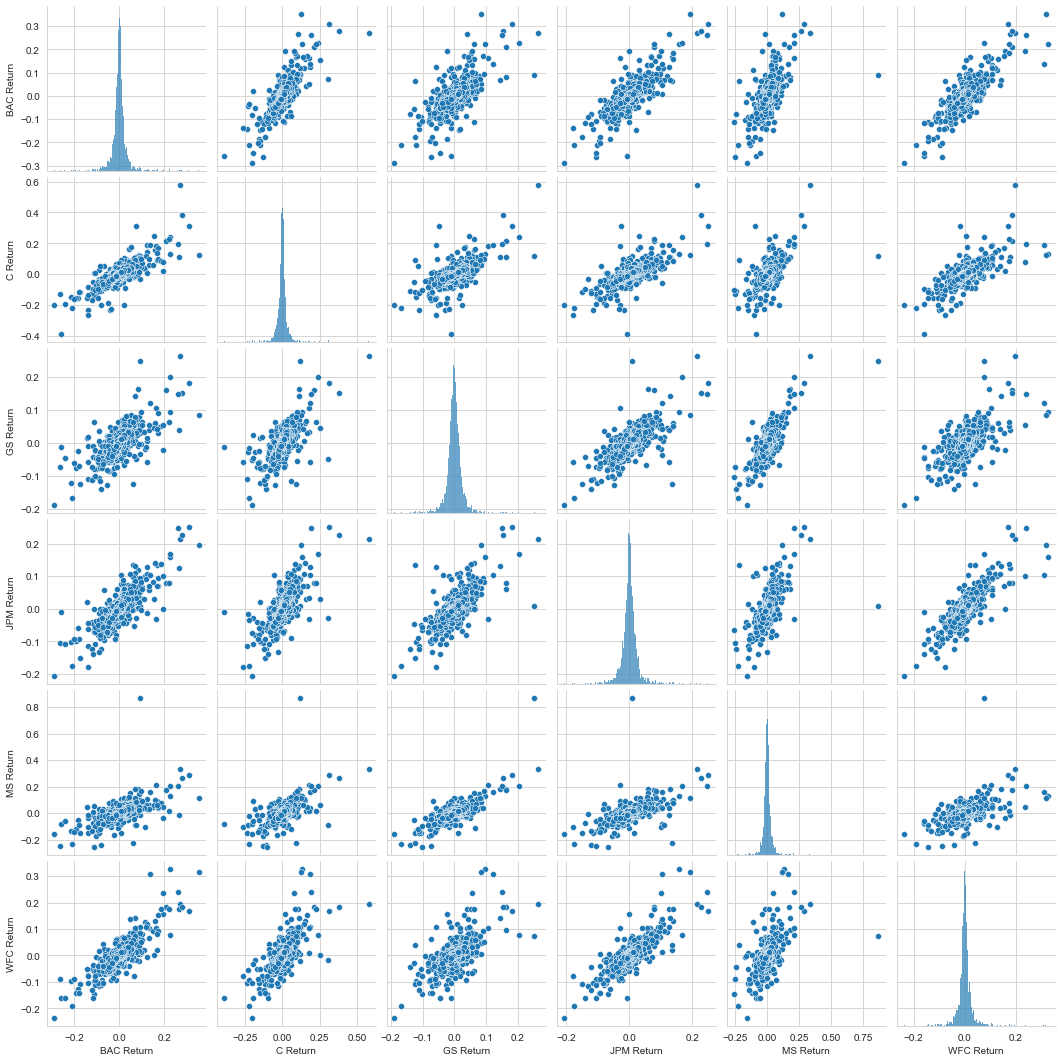

In [14]:
sns.pairplot(returns[1:])

In [15]:
returns.idxmin()

BAC Return   2009-01-20
C Return     2009-02-27
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2009-01-20
dtype: datetime64[ns]

In [16]:
returns.idxmax()

BAC Return   2009-04-09
C Return     2008-11-24
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns]

In [17]:
returns.std()

BAC Return    0.036647
C Return      0.038672
GS Return     0.025390
JPM Return    0.027667
MS Return     0.037819
WFC Return    0.030238
dtype: float64

In [18]:
returns.loc["2015-1-1":"2015-12-31"].std()

BAC Return    0.016163
C Return      0.015289
GS Return     0.014046
JPM Return    0.014017
MS Return     0.016249
WFC Return    0.012591
dtype: float64

<AxesSubplot:xlabel='MS Return', ylabel='Count'>

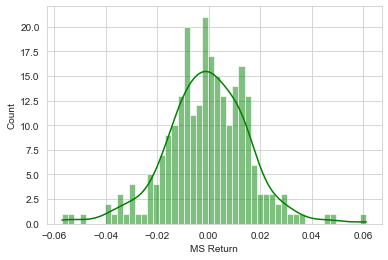

In [19]:
sns.histplot(returns.loc["2015-1-1":"2015-12-31"]["MS Return"], bins=50, 
             color="green", kde=True)

<AxesSubplot:xlabel='C Return', ylabel='Count'>

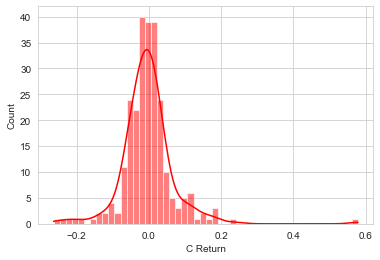

In [20]:
sns.histplot(returns.loc["2008-1-1":"2008-12-31"]["C Return"], bins=50, 
             color="red", kde=True)

<Figure size 432x288 with 0 Axes>

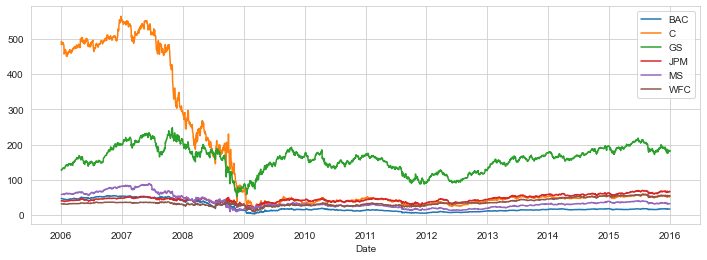

In [21]:
fig = plt.figure()
fig, axes = plt.subplots(figsize=(12,4))

axes.plot(bank_stocks.loc[:,pd.IndexSlice[:,"Close"]])
axes.set_xlabel('Date')
axes.legend(tickers, loc="best")

<AxesSubplot:xlabel='Date'>

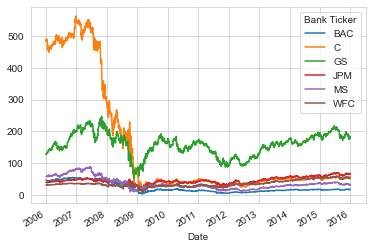

In [22]:
bank_stocks.xs(key="Close", axis=1, level="Stock Info").plot()

In [23]:
bank_stocks.xs(key="Close", axis=1, level="Stock Info").iplot()

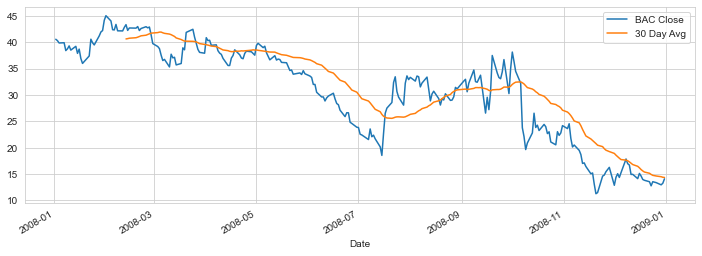

In [24]:
plt.figure(figsize=(12,4))
bac.loc["2008-1-1":"2008-12-31","Close"].plot(label="BAC Close")
bac.loc["2008-1-1":"2008-12-31","Close"].rolling(30).mean().plot(label="30 Day Avg")
plt.legend()

<AxesSubplot:xlabel='Bank Ticker-Stock Info', ylabel='Bank Ticker-Stock Info'>

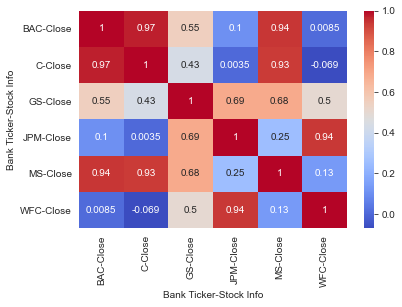

In [25]:
a = bank_stocks.loc[:, pd.IndexSlice[:,"Close"]].corr()
sns.heatmap(a, cmap="coolwarm", annot=True)

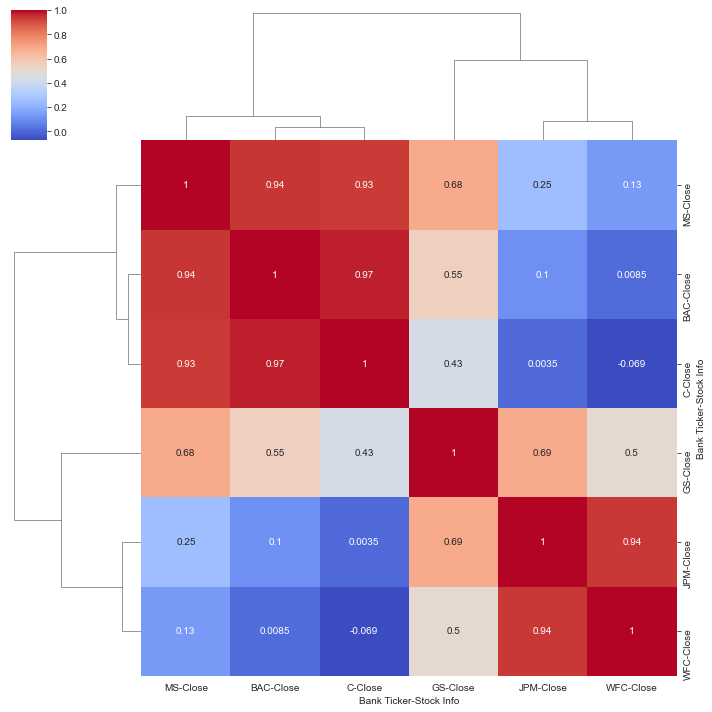

In [26]:
sns.clustermap(a, cmap="coolwarm", annot=True)

In [27]:
bac.loc["2015-1-1":"2016-1-1"].iplot(kind="candle")

In [29]:
ms.loc["2015-1-1":"2016-1-1", "Close"].ta_plot(study="sma", periods=[13,21,55])

In [30]:
bac.loc["2015-1-1":"2016-1-1", "Close"].ta_plot(study="boll")